### Import

In [1]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix

### Fonts

In [2]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Download and prepare the MNIST dataset

In [25]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_labels = np.expand_dims(train_labels,-1)
test_labels = np.expand_dims(test_labels,-1)

### Resize to 32 to match the CIFAR10 data

In [26]:
train_images_resized = []
test_images_resized = []
imresized = np.zeros((32,32))
for i in range(train_images.shape[0]):
    imarray = train_images[i,:,:]
    im = Image.fromarray(imarray)
    im = im.resize((32,32))
    imresized = np.array(im)
    imresized = imresized - np.min(imresized)
    imresized = imresized / np.max(imresized)
    train_images_resized.append(imresized)
for i in range(test_images.shape[0]):
    imarray = test_images[i,:,:]
    im = Image.fromarray(imarray)
    im = im.resize((32,32))
    imresized = np.array(im)
    imresized = imresized - np.min(imresized)
    imresized = imresized / np.max(imresized)
    test_images_resized.append(imresized)
test_images = np.array(test_images_resized) / 255.0
train_images = np.array(train_images_resized) / 255.0

### Sanity Check of the Data

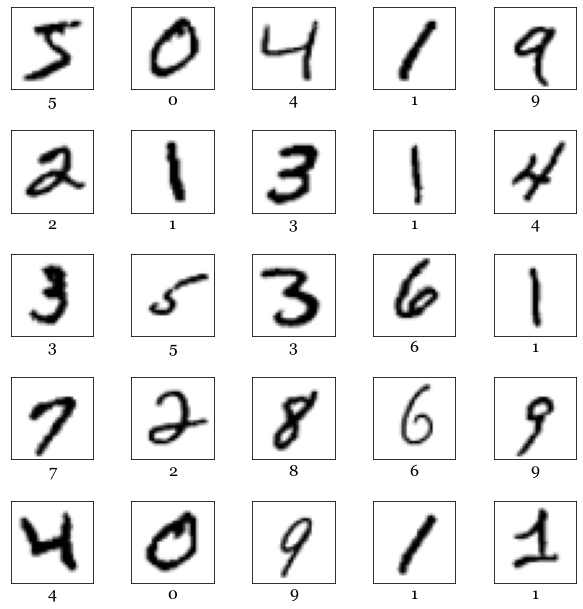

In [60]:
class_names = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(1-train_images[i],cmap='gray')
    plt.xlabel(class_names[train_labels[i][0]],**csfont,fontsize=16)

### Create the network

In [61]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32,32,1)))
model.add(layers.Dense(55, activation='tanh'))
model.add(layers.Dense(45, activation='tanh'))
model.add(layers.Dense(30, activation='tanh'))
model.add(layers.Dense(20, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 1024)              0         
                                                                 
 dense_114 (Dense)           (None, 55)                56375     
                                                                 
 dense_115 (Dense)           (None, 45)                2520      
                                                                 
 dense_116 (Dense)           (None, 30)                1380      
                                                                 
 dense_117 (Dense)           (None, 20)                620       
                                                                 
 dense_118 (Dense)           (None, 10)                210       
                                                                 
Total params: 61,105
Trainable params: 61,105
Non-tra

### Optimizer

In [62]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.000025,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam');

### Compile and train the model

In [63]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Fit the Model

In [64]:
history = model.fit(train_images, train_labels, epochs=40, 
                    validation_data=(test_images, test_labels))

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2244 - accuracy: 0.2988 - val_loss: 2.0032 - val_accuracy: 0.3500
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7376 - accuracy: 0.3685 - val_loss: 1.5646 - val_accuracy: 0.3881
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4982 - accuracy: 0.4123 - val_loss: 1.4356 - val_accuracy: 0.4258
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3920 - accuracy: 0.4604 - val_loss: 1.3448 - val_accuracy: 0.4845
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3082 - accuracy: 0.5155 - val_loss: 1.2695 - val_accuracy: 0.5242
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2368 - accuracy: 0.5465 - val_loss: 1.2033 - val_accuracy: 0.5563
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1734 - accuracy: 0.5822 - val_loss: 1.1426 - val_accuracy:

### Predict

In [65]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred,axis=1)
y_pred = np.expand_dims(y_pred,-1)
C = confusion_matrix(test_labels,y_pred);

### Plot the loss and accuracy over training epochs

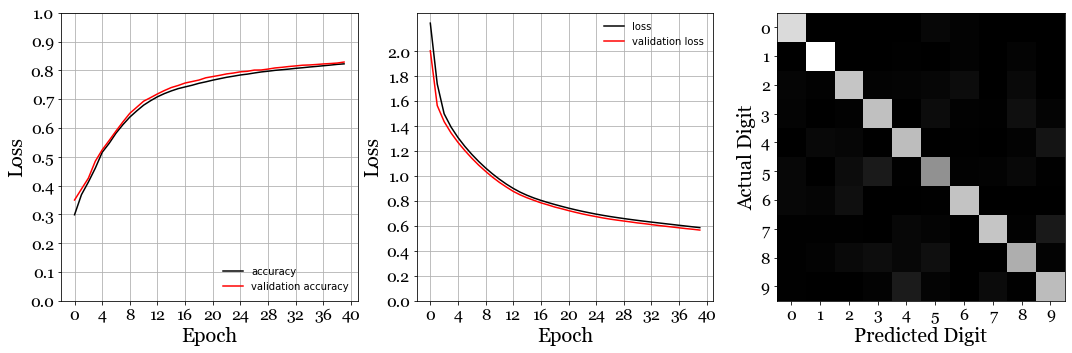

In [68]:
plt.figure(figsize=(14,4))
plt.subplots_adjust(left=0.0,bottom=0, right=1.0, top=1, wspace=0.2, hspace=0)
plt.subplot(1,3,1);
plt.plot(history.history['accuracy'], c='k',label='accuracy')
plt.plot(history.history['val_accuracy'],c='r', label = 'validation accuracy')
plt.xlabel('Epoch',**csfont,fontsize=20)
plt.ylabel('Loss',**csfont,fontsize=20)
plt.yticks(np.linspace(0,1,11),np.round(np.linspace(0,1,11),2).astype(float),**csfont,fontsize=16)
plt.xticks(np.linspace(0,40,11),np.linspace(0,40,11).astype(int),**csfont,fontsize=16)
plt.grid()
plt.legend(loc='lower right',frameon=False);
plt.subplot(1,3,2);
plt.plot(history.history['loss'], c='k', label='loss')
plt.plot(history.history['val_loss'], c='r',label = 'validation loss')
plt.xlabel('Epoch',**csfont,fontsize=20)
plt.ylabel('Loss',**csfont,fontsize=20)
plt.yticks(np.linspace(0,2,11),np.round(np.linspace(0,2,11),2).astype(float),**csfont,fontsize=16)
plt.xticks(np.linspace(0,40,11),np.linspace(0,40,11).astype(int),**csfont,fontsize=16)
plt.grid()
plt.legend(loc='upper right',frameon=False);
plt.subplot(1,3,3);
plt.imshow(C,cmap='gray');
plt.xlabel('Predicted Digit',**csfont,fontsize=20);
plt.ylabel('Actual Digit',**csfont,fontsize=20);
plt.xticks(np.linspace(0,9,10),np.linspace(0,9,10).astype(int),**csfont,fontsize=16);
plt.yticks(np.linspace(0,9,10),np.linspace(0,9,10).astype(int),**csfont,fontsize=16);
plt.savefig('../../assets/matplotlib/27-conventional-mnist.png', dpi=300,bbox_inches="tight")    